In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
r1=pd.read_csv(r'C:\Users\Rida Malik\Downloads\cust_transaction_details (1).csv',sep=',')
r2=pd.read_csv(r"C:\Users\Rida Malik\Downloads\Customer_DF (1).csv")

In [4]:
r1.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [5]:
r2.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1


In [6]:
r1.describe()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


In [7]:
r2.describe()

,Unnamed: 0,No_Transactions,No_Orders,No_Payments,Fraud
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714,0.363095
std,48.641546,2.801527,1.981919,2.113240,0.482330
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000,0.000000
50%,83.500000,4.000000,3.000000,1.000000,0.000000
75%,125.250000,5.000000,4.000000,2.000000,1.000000
max,167.000000,15.000000,8.000000,15.000000,1.000000


In [8]:
r1.columns

Index(['Unnamed: 0', 'customerEmail', 'transactionId', 'orderId',
       'paymentMethodId', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
       'transactionFailed', 'orderState'],
      dtype='object')

In [9]:
r2.columns

Index(['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud'],
      dtype='object')

In [10]:
r1.isnull()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [11]:
r2.isnull()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [12]:
r1.shape

(623, 11)

In [13]:
r2.shape

(168, 10)

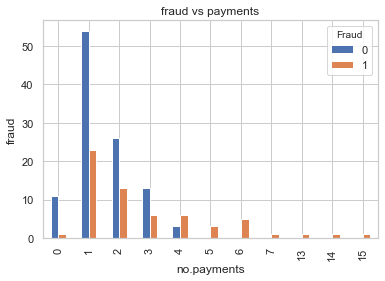

In [14]:
%matplotlib inline
pd.crosstab(r2.No_Payments,r2.Fraud).plot(kind='bar')
plt.title('fraud vs payments')
plt.xlabel('no.payments')
plt.ylabel('fraud')
plt.savefig('purchase_fre_job')

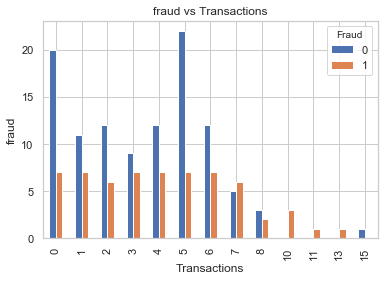

In [15]:
%matplotlib inline
pd.crosstab(r2.No_Transactions,r2.Fraud).plot(kind='bar')
plt.title('fraud vs Transactions')
plt.xlabel('Transactions')
plt.ylabel('fraud')
plt.savefig('purchase_fre_job')

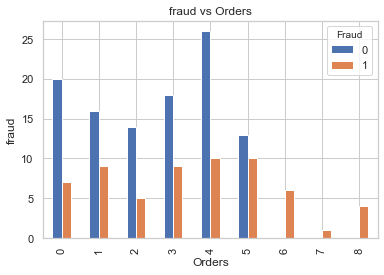

In [16]:
%matplotlib inline
pd.crosstab(r2.No_Orders,r2.Fraud).plot(kind='bar')
plt.title('fraud vs Orders')
plt.xlabel('Orders')
plt.ylabel('fraud')
plt.savefig('purchase_fre_job')

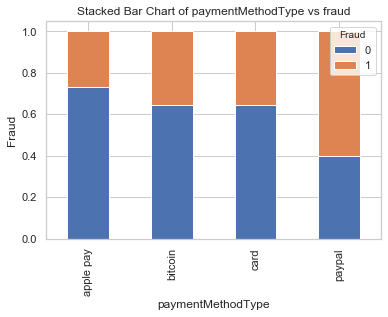

In [17]:
table=pd.crosstab(r1.paymentMethodType,r2.Fraud)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of paymentMethodType vs fraud')
plt.xlabel('paymentMethodType')
plt.ylabel('Fraud')
plt.savefig('paymentMethodtype_fraud_stack')

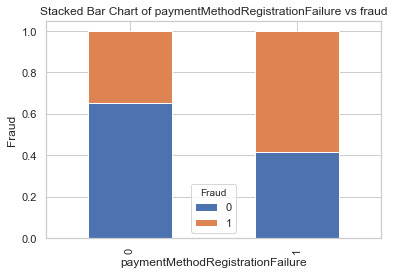

In [18]:
table=pd.crosstab(r1.paymentMethodRegistrationFailure,r2.Fraud)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of paymentMethodRegistrationFailure vs fraud')
plt.xlabel('paymentMethodRegistrationFailure')
plt.ylabel('Fraud')
plt.savefig('paymentMethodRegistrationFailure_fraud_stack')

In [19]:
r2['Fraud']=r2['Fraud'].apply(lambda x:1 if x else 0)

In [20]:
c=r2['customerPhone'].tolist()
l=[]
for cp in c:
   if 'x' in cp:
    l.append(cp)
print(l)
len(l)

['670.664.8168x94985', '1-885-168-1310x338', '(772)964-8162x6310', '(128)248-4091x37789', '897-464-6425x941', '(522)133-8741x643', '1-410-373-1228x129', '515.708.2280x105', '895-224-8246x9667', '1-412-734-7967x67388', '1-991-846-6271x54037', '(922)411-5121x98410', '467-222-0933x910', '650-489-7595x7901', '563-396-2038x288', '518.037.7423x366', '804-331-7488x82163', '995.449.5115x498', '592.309.4963x427', '737-377-9701x577', '384.291.0196x66623', '726-715-7429x06218', '(664)946-1521x6991', '1-670-969-5075x27186', '952-580-9304x38838', '791-857-3838x784', '731.957.1783x62296', '266-228-3021x90360', '(287)694-5221x45370', '255-915-9059x3369', '242.165.5396x07020', '754.248.6239x43965', '1-991-286-0655x973', '800.814.4655x012', '705.315.1466x180', '1-394-145-7899x0176', '002.940.3004x9094', '1-586-561-8956x40209', '830-346-6543x518', '1-820-539-4726x993', '201.737.5119x64000', '(986)656-8692x32356', '1-414-937-7421x73705', '257-706-1003x92053', '1-160-137-7889x74832', '(071)934-3315x27613'

83

In [21]:
r2['customerPhone']=r2['customerPhone'].apply(lambda x: 1 if x in l else 0)

In [22]:
r2=r2.drop(r2.loc[r2.customerPhone==1].index)

In [23]:
e=r2['customerEmail'].tolist()
l2=[]
for email in e:
    if(email.__contains__(".")!=True):
       l2.append(email)   
r2['validEmail']=r2['customerEmail'].apply(lambda x:0 if x in l2 else 1)

In [24]:
import sqlite3
usesql=sqlite3.connect('task1.sqlite')
r2.to_sql('r2',usesql,if_exists='replace',index=False)
r1.to_sql('r1',usesql,if_exists='replace',index=False)

C:\Users\Rida Malik\Anaconda3\lib\site-packages\pandas\core\generic.py:2531: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


In [25]:
table=pd.read_sql('select * from r2 a join r1 b using(customerEmail)',usesql)
print(table)

     Unnamed: 0                  customerEmail  customerPhone  \
0             0         josephhoward@yahoo.com              0   
1             0         josephhoward@yahoo.com              0   
2             1         evansjeffery@yahoo.com              0   
3             1         evansjeffery@yahoo.com              0   
4             1         evansjeffery@yahoo.com              0   
5             2      andersonwilliam@yahoo.com              0   
6             2      andersonwilliam@yahoo.com              0   
7             2      andersonwilliam@yahoo.com              0   
8             2      andersonwilliam@yahoo.com              0   
9             2      andersonwilliam@yahoo.com              0   
10            4               uchen@malone.com              0   
11            4               uchen@malone.com              0   
12            4               uchen@malone.com              0   
13            4               uchen@malone.com              0   
14            4          

In [26]:
table.drop('customerDevice',axis=1,inplace=True)
table.drop('customerBillingAddress',axis=1,inplace=True)
table.drop('transactionId',axis=1,inplace=True)
table.drop('orderId',axis=1,inplace=True)
table.drop(['paymentMethodId'],axis=1,inplace=True)
table.drop('Unnamed: 0',axis=1,inplace=True)
table.drop('customerEmail',axis=1,inplace=True)
table.drop('customerPhone',axis=1,inplace=True)
table.drop('transactionAmount',axis=1,inplace=True)

In [27]:
table.head()

,customerIPAddress,No_Transactions,No_Orders,No_Payments,Fraud,validEmail,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionFailed,orderState
0,8.129.104.40,2,2,1,0,1,1,card,JCB 16 digit,0,pending
1,8.129.104.40,2,2,1,0,1,1,card,JCB 16 digit,0,fulfilled
2,219.173.211.202,3,3,7,1,1,0,bitcoin,American Express,0,fulfilled
3,219.173.211.202,3,3,7,1,1,0,bitcoin,American Express,0,fulfilled
4,219.173.211.202,3,3,7,1,1,1,bitcoin,VISA 16 digit,1,fulfilled


In [28]:
df = pd.get_dummies(table)
df = df.fillna(0.0)
df.drop('Fraud',axis=1,inplace=True)
X=df

In [29]:
y=table['Fraud']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[66  0]
 [ 3 55]]


In [33]:
from sklearn.model_selection import GridSearchCV
def tuning(model, parameters, parameter_name, train_data_x, train_data_y, plot_values,is_xgb=False):
    grid = GridSearchCV(model, parameters, cv = 3, scoring = 'f1_macro')
    grid.fit(train_data_x, train_data_y)
    
    
    results = pd.DataFrame(grid.cv_results_)#storing results of gridseachcv in a dataframe to access its elements
    print(results)
    params = results['params']                         #storing combination of parameters used by model in params
    score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    for i in range(len(params)):
        print("For", params[i],"acc of CV data is", score_cv_array[i])
    
    
    print('Best Parameter is ',  grid.best_params_)
    print('Best F1 Score is ',  grid.best_score_)
    

    
    return grid.best_params_

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,log_loss


model = LogisticRegression()
a = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
aps = {'C' : a}
b_s = tuning(model, aps, 'C', X_train, y_train, a)

b_a = b_s['C']
clf = LogisticRegression(C =b_a).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', acc)
print('F1 Score of model on testing data is', f1)
print('Log loss of model on testing data is', ll)

C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarnin

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.005154      0.000395         0.002722        0.001198   1e-05   
1       0.004113      0.001122         0.004490        0.000613  0.0001   
2       0.004811      0.003412         0.006307        0.003562   0.001   
3       0.005683      0.000516         0.003666        0.000505    0.01   
4       0.004758      0.000474         0.003756        0.001806     0.1   
5       0.006503      0.000754         0.002114        0.000380       1   
6       0.007102      0.002812         0.002617        0.001281      10   
7       0.005890      0.002589         0.002679        0.001895     100   
8       0.006425      0.001826         0.004610        0.000948    1000   
9       0.006753      0.001570         0.002688        0.001902   10000   

          params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 1e-05}           0.382166           0.380645           0.380645   
1  {'C': 0.0001}    

C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec